A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to **predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.**

In [148]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 6]

<IPython.core.display.Javascript object>

In [149]:
train = pd.read_csv("~/Downloads/train.csv")
test = pd.read_csv("~/Downloads/test.csv")

# Combined the data
combined = pd.concat([train, test], ignore_index= True)

print(train.shape, test.shape, combined.shape)

(550068, 12) (233599, 11) (783667, 12)


In [150]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [151]:
#  What defines the Customer's Purchase Habits...
combined.columns

# Gender, Age, Occupation, Stay in Current City...
# marital status, City Category...

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [152]:
# Lets check the Info of the Data
combined.info()

# Fix the Stay in Current City.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [153]:
# describe of the data
combined.describe(include= "all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667,783667,783667,783667.000000,783667,783667,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
unique,NaN,3677,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,2709,590031,313015,NaN,329739,276425,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.079300,NaN,NaN,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,NaN,NaN,NaN,6.522206,NaN,NaN,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


* Age is binned.
* If there is any popular PRODUCT ID - P00265242
* Most of the transactions are done by Males.
* People in the age bracket of 26-35 are purchasing more than the rest.
* People from City Category B are purchasing the most.
* The Purchase Variable has min of $12 and Max of 23961 dollars

In [154]:
# Missing Values
miss = combined.isnull().sum()
percent = combined.isnull().sum()/combined.shape[0]

df = {"Missing Vals":miss, "Percentage":percent}
pd.DataFrame(df).sort_values(by = "Percentage", ascending = False)

,Missing Vals,Percentage
Product_Category_3,545809,0.696481
Product_Category_2,245982,0.313886
Purchase,233599,0.298085
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

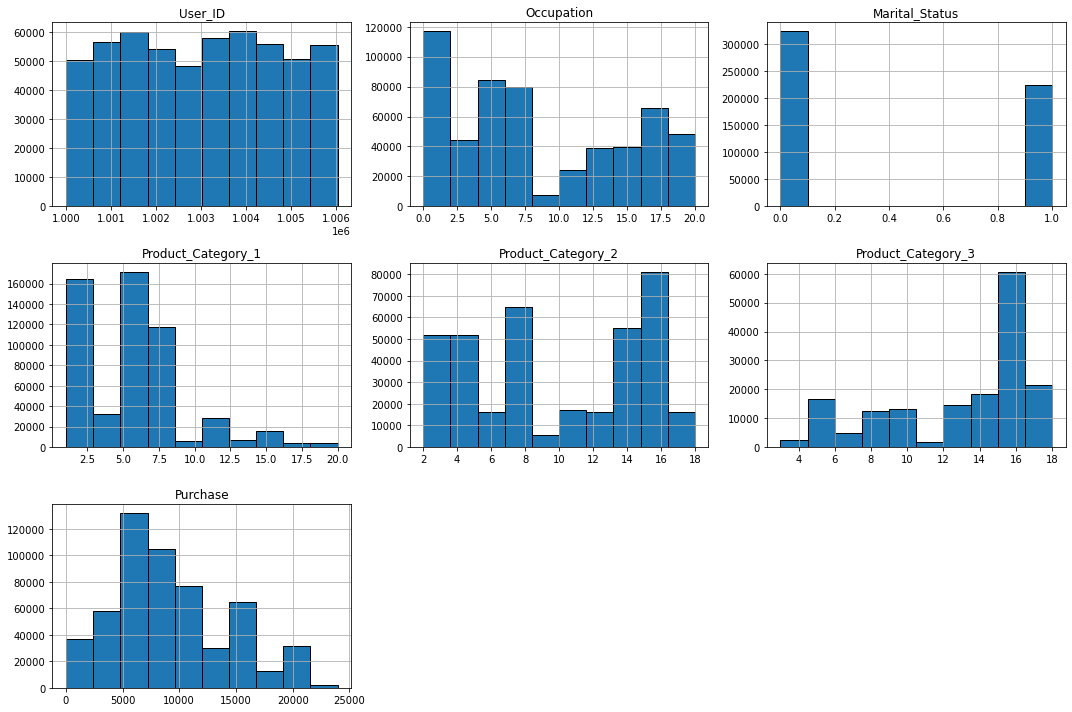

In [155]:
# Lets explore the data...
train.hist(edgecolor="black", figsize = (15, 10))
plt.tight_layout()
plt.show()

* 16 is the most preferred prod_cat for Customers in Prod Cat 3
* Purchase is +vely Skewed.
* Prod_Cat2 - 16, 8 appears to be the preferred ones.

* We will explore this data more...


In [156]:
# Product Category
combined.Product_Category_1.describe()

count    783667.000000
mean          5.366196
std           3.878160
min           1.000000
25%           1.000000
50%           5.000000
75%           8.000000
max          20.000000
Name: Product_Category_1, dtype: float64

In [157]:
combined.Product_Category_2.describe()

count    537685.000000
mean          9.844506
std           5.089093
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [158]:
combined.Product_Category_1.mode(),
combined.Product_Category_2.mode(), 
combined.Product_Category_3.mode()

0    16.0
Name: Product_Category_3, dtype: float64

* 5, 8 and 16 appear to be the most popular products

In [159]:
# Split the Data in Num and Cat Variables
num_cols = combined.select_dtypes(include = np.number).columns
cat_cols = combined.select_dtypes(exclude = np.number).columns

In [160]:
# Fix the Marital Status
combined["Marital_Status"]=combined.Marital_Status.astype("object")

In [161]:
print(num_cols), print(cat_cols)

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')
Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')


(None, None)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

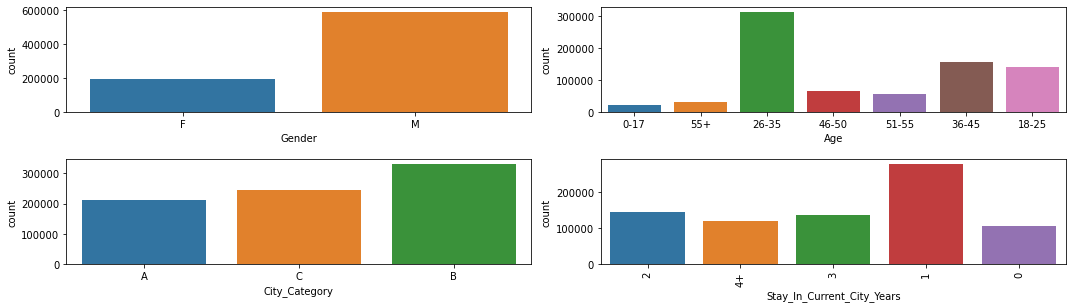

In [162]:
# Plot the Categories...
a=3
b=2
c=1
#plt.figure(figsize=[12,10])
for i in cat_cols[1:]:
  plt.subplot(a,b,c)
  sns.countplot(combined.loc[:,i])
  plt.xlabel(i)
  c=c+1
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

* Males are more than females in this data and hence, it is clear that most of the purchase is done by males only.
* The most popular age bracket is 26-35 followed by 36-45
* City Cat B then C followed by A in the descending order of Purchase.
* Most of the people making purchase are Independent of any person in life.
* Most of them have stayed for min 1 year...


In [163]:
# Remove Special Character from Stay and Age
combined['Stay_In_Current_City'] = combined.Stay_In_Current_City_Years.str.strip("+").astype("float")

In [164]:
# Same will done in Age...
combined['Age'] = combined.Age.str.strip("+")

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Age', ylabel='count'>

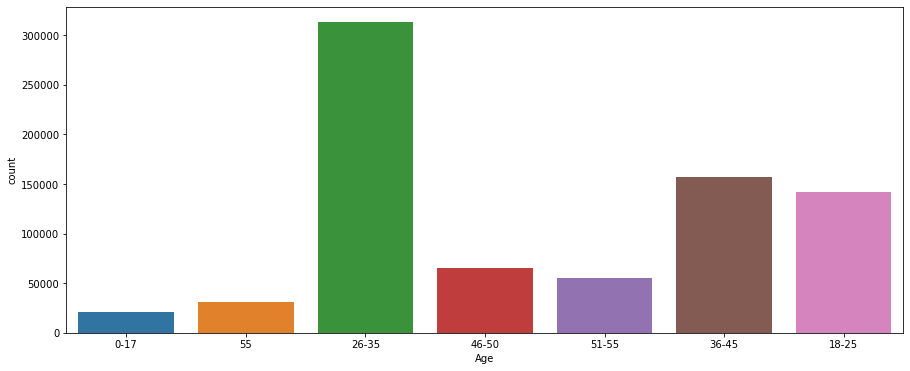

In [165]:
# Check the Age var
sns.countplot(x = "Age", data = combined)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

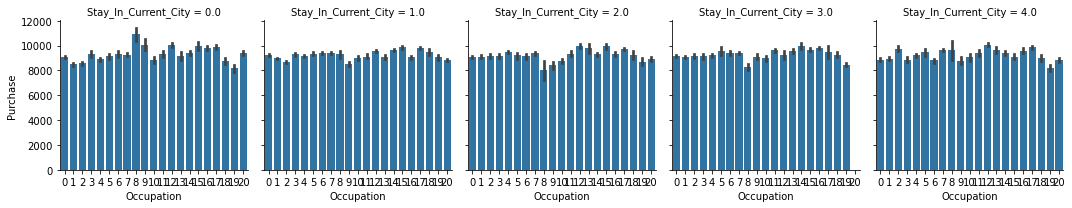

In [166]:
# Stay In City, Marital Status and Occupation has an effect on Tgt Variable...

# FacetGrid Plot

g = sns.FacetGrid(combined, col = "Stay_In_Current_City")
g.map(sns.barplot, "Occupation", "Purchase")
plt.show()

#Inference: that there is no effect on 
#Purchase irrespective of the Marital Status, his stay in current city & Occupation...

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

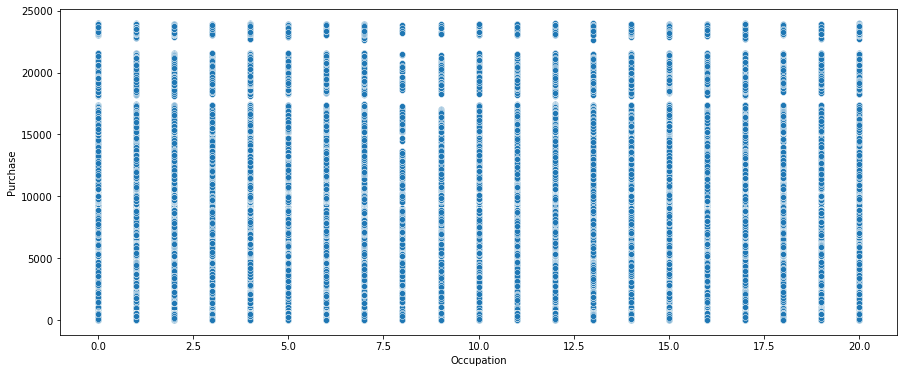

In [45]:
# Check the Occupation vs Purchase
sns.scatterplot(combined.Occupation, combined.Purchase)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

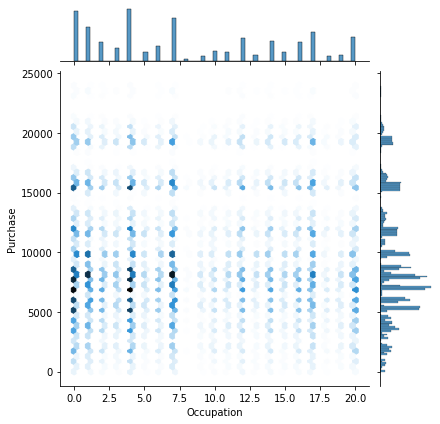

In [46]:
# hexplot or jointplot

sns.jointplot(x = "Occupation", y = "Purchase", data = combined, kind = "hex")
plt.show()

* Most of the Purchase is between 5000-10000 range.
* The Occupation in the range 0-7 have the highest purchase where 4 appears to be the profession where people make the most of the purchases.

#### How this Info can be used
* Company can target Occupations between 0 - 7 and run marketing campaigns to encourage people to buy more.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

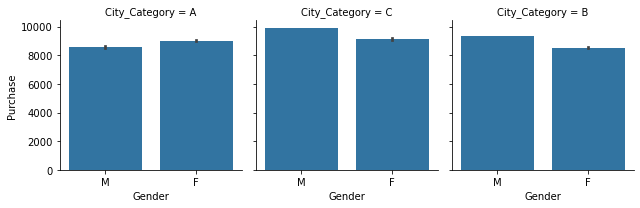

In [49]:
# Check City Category with Gender and Purchase...

g = sns.FacetGrid(combined, col = "City_Category") # Facetgrid Object
g.map(sns.barplot, "Gender", "Purchase") # func, x, y


# We see that City Category C has the highest no of Purchases Witnessed.
# For City Cat B & C, males tend to dominate the Purchase...
# Where as in City A, we see that females are the biggest spenders...

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

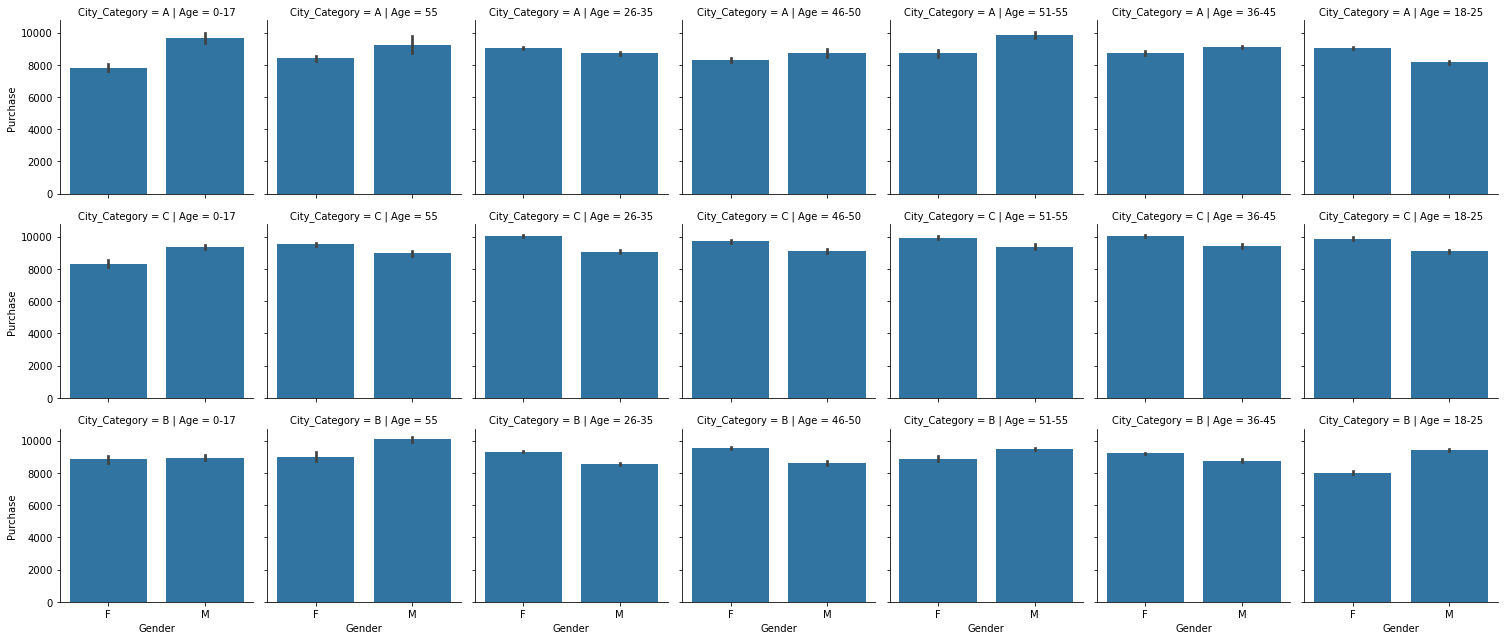

In [50]:
# Age, city category followed by Gender and Purchase.

g = sns.FacetGrid(combined, row = "City_Category", col = "Age") # Facetgrid Object
g.map(sns.barplot, "Gender", "Purchase") # func, x, y
plt.show()

* There are two age groups in the City Cat_A 26-35 and 18-25 for which the females have made lot of purchases.
* We can say that Age Bracket 26-35 and 18-25 in A City are the potential buyers...

In [57]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,2.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,2.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,2.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,2.0
4,1000002,P00285442,M,55,16,C,4+,0,8,NaN,NaN,7969.0,4.0


In [58]:
combined.Product_Category_1.describe()

count    783667.000000
mean          5.366196
std           3.878160
min           1.000000
25%           1.000000
50%           5.000000
75%           8.000000
max          20.000000
Name: Product_Category_1, dtype: float64

In [167]:
# Deploying Statistical Test to Check the relation between marital stats and product_cat1

# Ho: That Prod Cat is Independent of the Gender
# Ha: That Prod Cat is Dependent on the Gender

import scipy.stats as stats

# Tabulate the Data
tabulate = pd.crosstab(combined.Gender, combined.Product_Category_1)

# Deploy the Test
teststats, pvalue, df, exp_freq = stats.chi2_contingency(tabulate)

# Print the Pvalue
print(pvalue)

0.0


<AxesSubplot:xlabel='Gender'>

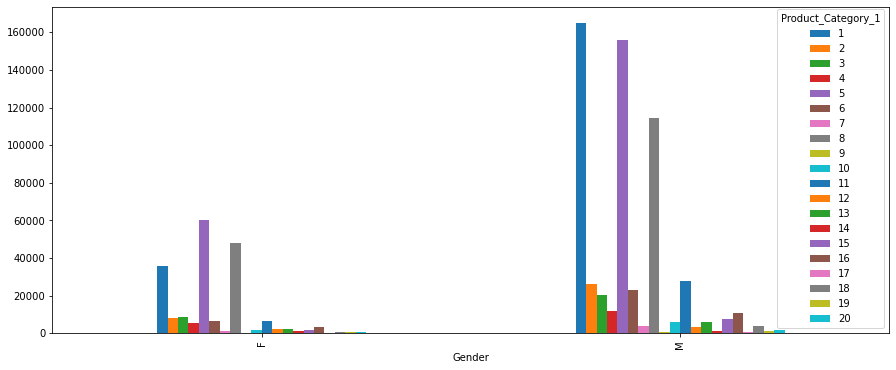

In [168]:
tabulate.plot(kind ="bar")

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

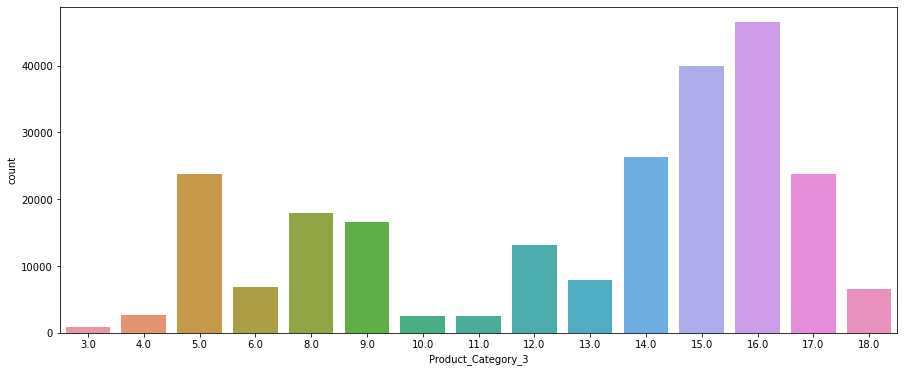

In [169]:
# With Product Category, Take Where the Gender == Male, Product Category median value

sns.countplot(combined.Product_Category_3)

In [76]:
combined.loc[combined.Gender=="F", "Product_Category_3"].describe()

count    53621.000000
mean        12.463475
std          4.125628
min          3.000000
25%          9.000000
50%         14.000000
75%         16.000000
max         18.000000
Name: Product_Category_3, dtype: float64

In [170]:
# Does City Category has any role in Product Category

# Ho: That Prod Cat is Independent of the City Category
# Ha: That Prod Cat is Dependent on the City Category

import scipy.stats as stats

# Tabulate the Data
tabulate = pd.crosstab(combined.City_Category, combined.Product_Category_1)

# Deploy the Test
teststats, pvalue, df, exp_freq = stats.chi2_contingency(tabulate)

# Print the Pvalue
print(pvalue)

0.0


<AxesSubplot:xlabel='City_Category'>

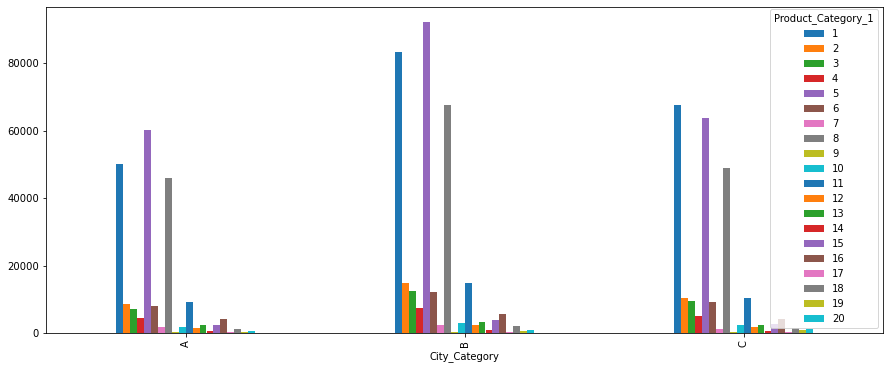

In [78]:
tabulate.plot(kind = "bar")

In [171]:
combined.groupby(["City_Category", "Gender"])["Product_Category_2"].describe()

count       mean       std  min  25%   50%   75%  \
City_Category Gender                                                        
A             F        33582.0  10.124710  4.798571  2.0  6.0  11.0  14.0   
              M       106543.0   9.895713  5.092870  2.0  5.0   9.0  15.0   
B             F        55225.0   9.994006  4.853629  2.0  5.0  10.0  14.0   
              M       169990.0   9.768433  5.148369  2.0  5.0   9.0  15.0   
C             F        42014.0   9.923502  4.950752  2.0  5.0  10.0  14.0   
              M       130331.0   9.740852  5.215808  2.0  5.0   9.0  15.0   

                       max  
City_Category Gender        
A             F       18.0  
              M       18.0  
B             F       18.0  
              M       18.0  
C             F       18.0  
              M       18.0

In [172]:
# Impute the Missing Values in Prod_Cat_2

# City Condition
ca = combined.City_Category=="A"
cb = combined.City_Category=="B"
cc = combined.City_Category=="C"


# Gender
c_m = combined.Gender=="M"
c_f = combined.Gender=="F"

combined.loc[(ca) & (c_m) &(combined["Product_Category_2"].isnull()), 
             "Product_Category_2"] = 9.0

combined.loc[(ca) & (c_f) &(combined["Product_Category_2"].isnull()), 
             "Product_Category_2"]=11.0

combined.loc[(cb) & (c_m) &(combined["Product_Category_2"].isnull()),
             "Product_Category_2"]=9.0

combined.loc[(cb) & (c_f) &(combined["Product_Category_2"].isnull()),
             "Product_Category_2"]=10.0

combined.loc[(cc) & (c_m) &(combined["Product_Category_2"].isnull()),
             "Product_Category_2"]=9.0
combined.loc[(cc) & (c_f) &(combined["Product_Category_2"].isnull()),
             "Product_Category_2"]=10.0

In [173]:
combined.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
Stay_In_Current_City               0
dtype: int64

In [174]:
# Imputate the missing value in catergory 2
ca=combined.City_Category=='A'
cb=combined.City_Category=='B'
cc=combined.City_Category=='C'

# Gender
c_m=combined.Gender=='M'
c_f=combined.Gender=='F'

combined.loc[(ca) & (c_m) &(combined["Product_Category_3"].isnull()), 
             "Product_Category_3"] = 15.0

combined.loc[(ca) & (c_f) &(combined["Product_Category_3"].isnull()), 
             "Product_Category_3"]=14.0

combined.loc[(cb) & (c_m) &(combined["Product_Category_3"].isnull()),
             "Product_Category_3"]=15.0

combined.loc[(cb) & (c_f)&(combined["Product_Category_3"].isnull()),
             "Product_Category_3"]=14.0

combined.loc[(cc) & (c_m)&(combined["Product_Category_3"].isnull()),
             "Product_Category_3"]=15.0

combined.loc[(cc) & (c_f)&(combined["Product_Category_3"].isnull()),
             "Product_Category_3"]=14.0

In [175]:
combined.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
Stay_In_Current_City               0
dtype: int64

In [116]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City
0,1000001,P00069042,F,0-17,10,A,2,0,3,11.0,14.0,8370.0,2.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,2.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,11.0,14.0,1422.0,2.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,14.0,1057.0,2.0
4,1000002,P00285442,M,55,16,C,4+,0,8,9.0,15.0,7969.0,4.0


In [176]:
# Top5 Products
prod = combined.Product_ID.value_counts().index[:5]

In [177]:
def products(x):
    if x in prod:
        return("Top5")
    else:
        return("Others")

In [178]:
combined["Prod_ID"] = combined.Product_ID.apply(products)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Prod_ID', ylabel='Purchase'>

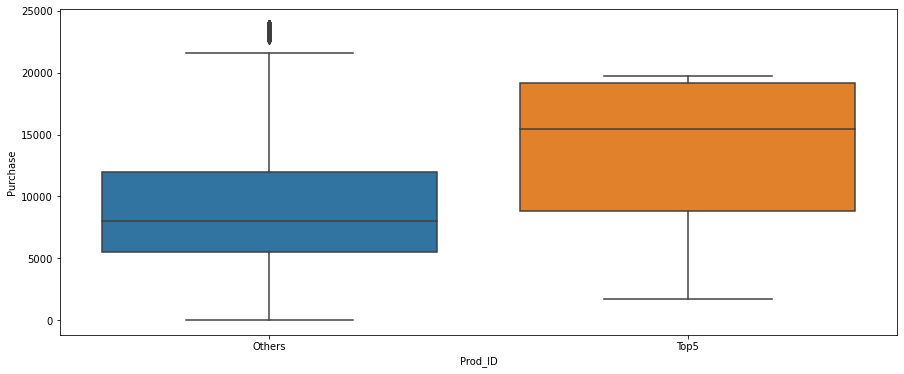

In [179]:
sns.boxplot(x = "Prod_ID", y = "Purchase", data = combined)

### Dropping the Unnecessary Variables

In [180]:
combined.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase',
       'Stay_In_Current_City', 'Prod_ID'],
      dtype='object')

In [181]:
new = combined.drop(['User_ID', 'Product_ID', 'Stay_In_Current_City_Years'], axis = 1)

In [182]:
new.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City,Prod_ID
0,F,0-17,10,A,0,3,11.0,14.0,8370.0,2.0,Others
1,F,0-17,10,A,0,1,6.0,14.0,15200.0,2.0,Others
2,F,0-17,10,A,0,12,11.0,14.0,1422.0,2.0,Others
3,F,0-17,10,A,0,12,14.0,14.0,1057.0,2.0,Others
4,M,55,16,C,0,8,9.0,15.0,7969.0,4.0,Others


In [183]:
new.Age.unique()

array(['0-17', '55', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [184]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

new["Age_Encoded"] = le.fit_transform(new.Age)

In [185]:
# Applying pd.get_dummies

dummydata = pd.get_dummies(new.drop("Age", axis=1), drop_first=True)

In [186]:
# Split the Data in newtrain and newtest

newtrain = dummydata.loc[0:train.shape[0]-1, :]
newtest = dummydata.loc[train.shape[0]:, :]

print(newtrain.shape, newtest.shape)

(550068, 12) (233599, 12)


In [187]:
train.shape, test.shape

((550068, 12), (233599, 11))

In [188]:
# Drop the Purchase variable from new test and define the X and y

newtest = newtest.drop("Purchase", axis = 1)
X = newtrain.drop("Purchase", axis = 1)
y = newtrain.Purchase

### Model Building

In [240]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
#import lightgbm as lgbm

# Models
lr = LinearRegression()
dtree = DecisionTreeRegressor()
rf = RandomForestRegressor()
gbm = GradientBoostingRegressor()
ada = AdaBoostRegressor()
bag = BaggingRegressor()
xgb_r = xgb.XGBRegressor()
#lgbr = lgbm.LGBMRegressor()

In [194]:
# Linear Regression

pred_lr = lr.fit(X, y).predict(newtest)
solution = pd.DataFrame({"Purchase":pred_lr, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("LRMODEL.csv", index=False) # 4687.193511838603

In [195]:
cd

/Users/mukulchauhan


In [196]:
# Decision Tree Model

pred_tree = dtree.fit(X, y).predict(newtest)
solution = pd.DataFrame({"Purchase":pred_tree, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("TREEMODEL.csv", index=False) # 3256.1745641335124

In [230]:
# Random Forest Model

pred_rf = rf.fit(X, y).predict(newtest)
solution = pd.DataFrame({"Purchase":pred_rf, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("RFMODEL.csv", index=False) # 3008.490038248746

In [231]:
# Bagging Regressor

pred_bag = bag.fit(X, y).predict(newtest)
solution = pd.DataFrame({"Purchase":pred_bag, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("BAGMODEL.csv", index=False) # 3046.0216137657508

In [232]:
# ADABOOST Regressor

pred_ada = ada.fit(X, y).predict(newtest)
solution = pd.DataFrame({"Purchase":pred_ada, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("ADAMODEL.csv", index=False) # 3822 

In [235]:
# GBM Regressor

pred_gbm = gbm.fit(X, y).predict(newtest)
solution = pd.DataFrame({"Purchase":pred_gbm, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("GBMMODEL.csv", index=False) # 2980

In [241]:
# XGBM

pred_xgbr = xgb_r.fit(X, y).predict(newtest)
solution = pd.DataFrame({"Purchase":pred_xgbr, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("XGBMODEL.csv", index=False) # 2866

#### Tuning the XGBRegressor

In [242]:
from sklearn.model_selection import GridSearchCV

params = [{"learning_rate":[0.1, 0.2, 0.01, 0.3, 0.5],
          "max_depth":[4, 5, 6, 8]}]

xgb_r = xgb.XGBRegressor()

In [243]:
# ...sshhh the machine is learning...
grid = GridSearchCV(estimator=xgb_r, param_grid=params, cv = 5)

# Fitting the Grid Search Model
grid.fit(X, y)

#Printing the best parameters..
print(grid.best_params_)

{'learning_rate': 0.3, 'max_depth': 8}


In [244]:
# Lets Build a Tuned Model
xgb_r = xgb.XGBRegressor(learning_rate = 0.3, max_depth = 8)

pred_xgbr = xgb_r.fit(X, y).predict(newtest)
solution = pd.DataFrame({"Purchase":pred_xgbr, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("XGBTunedMODEL.csv", index=False) # 2838

In [251]:
df = pd.DataFrame(data = xgb_r.feature_importances_, 
                  columns = ["Feat_imp"], index = xgb_r.feature_names_in_)

<AxesSubplot:>

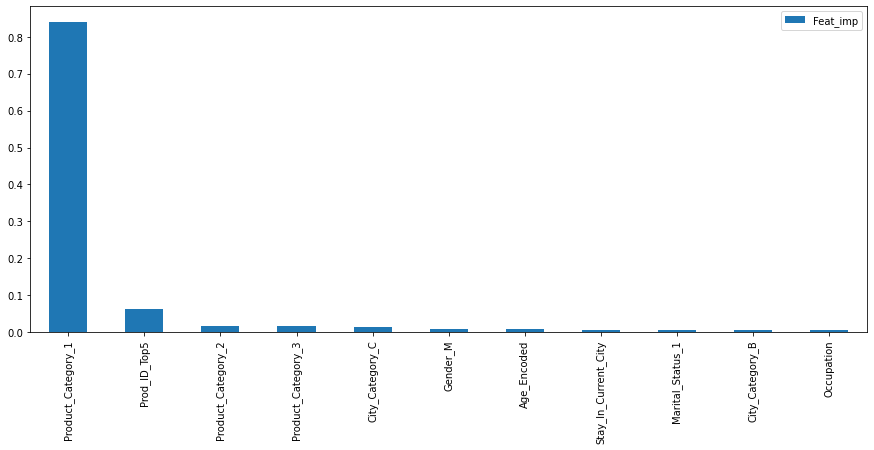

In [255]:
df.sort_values(by = "Feat_imp", ascending = False,kind = "quicksort").plot(kind = "bar")

In [257]:
# Selecting Top2 Features
subset = X.loc[:, ["Product_Category_1", "Prod_ID_Top5"]]

In [259]:
# Lets Build a Tuned Model on Subset of the Data
xgb_r = xgb.XGBRegressor(learning_rate = 0.3, max_depth = 8)

pred_xgbr = xgb_r.fit(subset, y).predict(newtest.loc[:, ["Product_Category_1", 
                                                         "Prod_ID_Top5"]])
solution = pd.DataFrame({"Purchase":pred_xgbr, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("XGBSubsetMODEL.csv", index=False) # 3026

#### Cross Validation Model - XGB

In [264]:
#from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle = True)

xgbr = xgb.XGBRegressor(learning_rate = 0.3, max_depth = 8)
pred_model = pd.DataFrame()

n = 10
for i in range(n):
    folds = next(kfold.split(X)) # Splitting the data in even groups...
    xtrain = X.iloc[folds[0]]
    ytrain = y.iloc[folds[0]]
    pred_model[i] = xgbr.fit(xtrain, ytrain).predict(newtest)  

In [265]:
XGB_cv = pred_model.mean(axis=1)

solution = pd.DataFrame({"Purchase":XGB_cv, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("XGB_CV25.csv", index=False) # 2831

In [268]:
import catboost as cb

cbr = cb.CatBoostRegressor()

In [269]:
pred_cbr = cbr.fit(X, y).predict(newtest)
solution = pd.DataFrame({"Purchase":pred_cbr, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("Catboost.csv", index=False) # 2870

Learning rate set to 0.11096
0:	learn: 4743.3164109	total: 93ms	remaining: 1m 32s
1:	learn: 4509.9435925	total: 118ms	remaining: 58.6s
2:	learn: 4318.6480236	total: 137ms	remaining: 45.7s
3:	learn: 4153.9704907	total: 158ms	remaining: 39.3s
4:	learn: 4025.9940315	total: 185ms	remaining: 36.8s
5:	learn: 3882.3180983	total: 205ms	remaining: 33.9s
6:	learn: 3774.4159025	total: 229ms	remaining: 32.5s
7:	learn: 3666.4427000	total: 250ms	remaining: 30.9s
8:	learn: 3589.1164146	total: 275ms	remaining: 30.3s
9:	learn: 3510.9221412	total: 298ms	remaining: 29.5s
10:	learn: 3451.7912062	total: 324ms	remaining: 29.2s
11:	learn: 3390.9060933	total: 351ms	remaining: 28.9s
12:	learn: 3337.0398680	total: 386ms	remaining: 29.3s
13:	learn: 3297.3821928	total: 426ms	remaining: 30s
14:	learn: 3270.9100269	total: 491ms	remaining: 32.2s
15:	learn: 3242.5667386	total: 545ms	remaining: 33.5s
16:	learn: 3222.4533411	total: 592ms	remaining: 34.2s
17:	learn: 3206.2059255	total: 639ms	remaining: 34.9s
18:	learn: 

Conclusion

**The Best Model is XGB with CV =10 and Learning Rate = 0.3 and Max Depth = 8.**